<a href="https://colab.research.google.com/github/trongthuan205/DS102.K21/blob/master/06_LogisticRegression_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 . Import library

In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# 1 . Load data

In [0]:
data = keras.datasets.mnist

In [0]:
(X_trainFull, y_trainFull), (X_testFull, y_testFull) = data.load_data()

In [166]:
print(X_trainFull.shape[0], 'train samples')

60000 train samples


In [167]:
print(X_testFull.shape[0], 'test samples')

10000 test samples


# 2 . Split data

In [168]:
X_train = X_trainFull[0:600]
X_train.shape

(600, 28, 28)

In [169]:
y_train = y_trainFull[0:600]
y_train.shape

(600,)

In [170]:
X_test = X_testFull[0:100]
X_test.shape

(100, 28, 28)

In [171]:
y_test = y_testFull[0:100]
y_test.shape

(100,)

# 3 . Visualize data

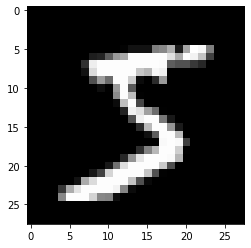

In [172]:
#Visulize random digit
digit = X_train[0,:]
plt.imshow(digit, cmap = matplotlib.cm.get_cmap('gist_gray'))

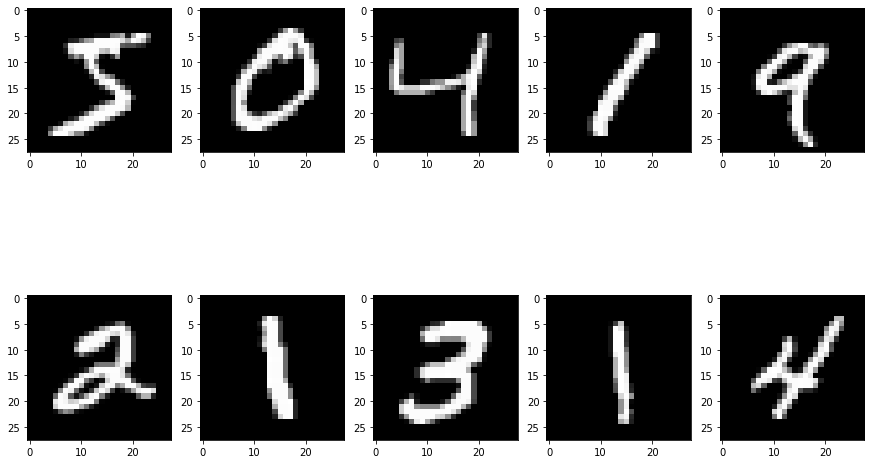

In [173]:
#Visualize top 10 digit
plt.figure(figsize = (15, 15))
for i in range(10):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_train[i], cmap = matplotlib.cm.get_cmap('gist_gray'))

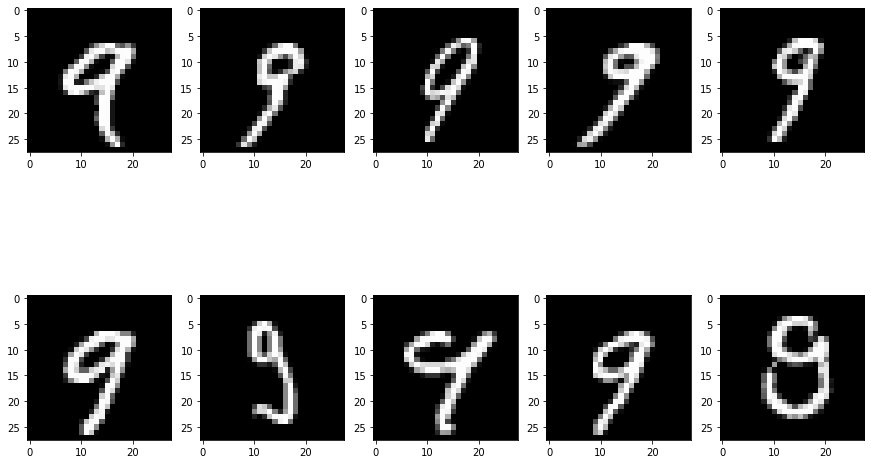

In [174]:
#Visualize top 10 digit in class 9
index = np.where(y_train == 9)[0][:10]
plt.figure(figsize = (15, 15))
for i, j in enumerate(index):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_train[j], cmap = matplotlib.cm.get_cmap('gist_gray'))

# 4 . Normalize data

Normal

In [175]:
X_train_normal = X_train.reshape(X_train.shape[0], -1)
X_train_normal.shape

(600, 784)

In [176]:
y_train = y_train.reshape(-1,1)
y_train.shape

(600, 1)

In [177]:
X_test_normal = X_test.reshape(X_test.shape[0], -1)
X_test_normal.shape

(100, 784)

In [178]:
y_test = y_test.reshape(-1, 1)
y_test.shape

(100, 1)

In [0]:
SC = StandardScaler()

In [0]:
X_train_normal = SC.fit_transform(X_train_normal)

In [0]:
X_test_normal = SC.fit_transform(X_test_normal)

Histogram of Oriented Gradients

In [182]:
X_train_hog = np.array([hog(i, orientations = 10, pixels_per_cell=(2, 2), cells_per_block=(1, 1)) for i in X_train])
X_train_hog.shape

(600, 1960)

In [183]:
X_test_hog = np.array([hog(i, orientations = 10, pixels_per_cell=(2, 2), cells_per_block=(1, 1)) for i in X_test])
X_test_hog.shape

(100, 1960)

# 5 . Build model

Normal

In [0]:
model = LogisticRegression(random_state = 0)

In [185]:
model.fit(X_train_normal, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [186]:
y_train_pred = model.predict(X_train_normal)
y_train_pred.shape

(600,)

In [187]:
y_test_pred = model.predict(X_test_normal)
y_test_pred.shape

(100,)


Histogram of Oriented Gradients

In [0]:
model_hog = LogisticRegression(random_state = 0)

In [189]:
model_hog.fit(X_train_hog, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [190]:
y_train_hog = model_hog.predict(X_train_hog)
y_train_hog.shape

(600,)

In [191]:
y_test_hog =  model_hog.predict(X_test_hog)
y_test_hog.shape

(100,)

# 6 . Evaluate

Train data

In [192]:
print("Accuray score in train data: ", accuracy_score(y_train, y_train_pred))
print("Accuray score in train data (HOG): ", accuracy_score(y_train, y_train_hog))  

Accuray score in train data:  1.0
Accuray score in train data (HOG):  1.0


Text(0.5, 1.0, 'Confusion matrix in train data (HOG)')

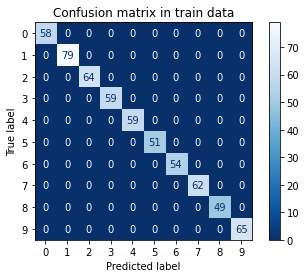

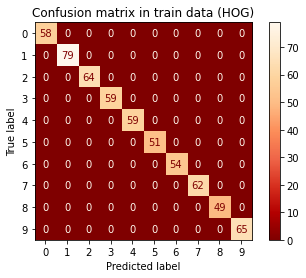

In [193]:
plot_confusion_matrix(model, X_train_normal, y_train, cmap = 'Blues_r')
plt.title('Confusion matrix in train data')
plot_confusion_matrix(model_hog, X_train_hog, y_train, cmap = 'OrRd_r')
plt.title('Confusion matrix in train data (HOG)')

Test data

In [194]:
print("Accuray score in test data: ", accuracy_score(y_test, y_test_pred))
print("Accuray score in test data (HOG): ", accuracy_score(y_test, y_test_hog)) 

Accuray score in test data:  0.85
Accuray score in test data (HOG):  0.97


Text(0.5, 1.0, 'Confusion matrix in test data (HOG)')

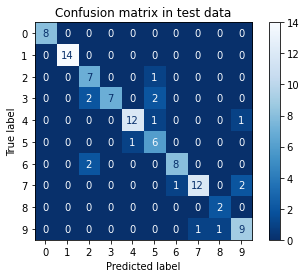

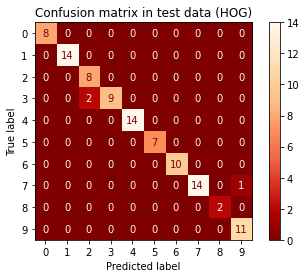

In [195]:
plot_confusion_matrix(model, X_test_normal, y_test, cmap = 'Blues_r')
plt.title('Confusion matrix in test data')
plot_confusion_matrix(model_hog, X_test_hog, y_test, cmap = 'OrRd_r')
plt.title('Confusion matrix in test data (HOG)')